<a href="https://colab.research.google.com/github/satishsinghtoo/Machine-Learning/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df = df.iloc[:,1:]

In [7]:
df.shape

(100, 3)

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


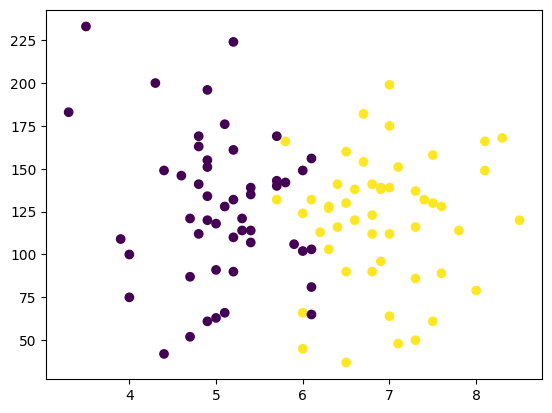

In [9]:
  plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
54,6.4,141.0
5,7.1,48.0
20,6.6,120.0
71,6.1,132.0
33,6.0,149.0
...,...,...
27,6.0,124.0
57,6.5,130.0
37,8.1,149.0
74,6.7,154.0


In [15]:
y_train

54    1
5     1
20    1
71    1
33    0
     ..
27    1
57    1
37    1
74    1
29    1
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
85,5.8,166.0
90,7.3,86.0
96,4.4,42.0
38,6.5,160.0
60,6.9,139.0
76,4.9,155.0
15,5.1,176.0
43,6.8,141.0
30,7.6,128.0
95,4.3,200.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 0.35718373,  0.49241708],
       [ 0.97369262, -1.89687622],
       [ 0.53332912, -0.04710076],
       [ 0.09296563,  0.26119515],
       [ 0.00489293,  0.69794769],
       [ 1.23791072,  0.26119515],
       [-0.96390676,  0.74933034],
       [-0.87583407, -0.09848342],
       [-0.69968867, -0.30401402],
       [-1.05197946,  0.49241708],
       [-0.78776137,  0.15842984],
       [ 0.88561992, -1.48581501],
       [ 2.03056501,  1.18608288],
       [-1.14005216, -0.89491452],
       [-1.75656106, -0.56092728],
       [ 0.00489293, -1.43443236],
       [ 0.88561992,  1.36592216],
       [-0.96390676,  1.90544   ],
       [-0.69968867, -0.81784054],
       [ 2.20671041, -0.04710076],
       [ 0.09296563, -1.04906247],
       [ 0.88561992,  0.44103443],
       [ 0.44525642, -0.81784054],
       [-1.14005216, -1.79411092],
       [-1.05197946,  1.05762625],
       [ 0.97369262,  0.74933034],
       [-0.96390676, -0.04710076],
       [ 0.79754722, -0.66369258],
       [-0.69968867,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-0.17125247,  1.13470022],
       [ 1.14983802, -0.92060584],
       [-1.40427026, -2.05102418],
       [ 0.44525642,  0.98055227],
       [ 0.79754722,  0.44103443],
       [-0.96390676,  0.85209564],
       [-0.78776137,  1.39161348],
       [ 0.70947452,  0.49241708],
       [ 1.41405612,  0.15842984],
       [-1.49234296,  2.0082053 ]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_test

85    1
90    1
96    0
38    1
60    1
76    0
15    0
43    1
30    1
95    0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

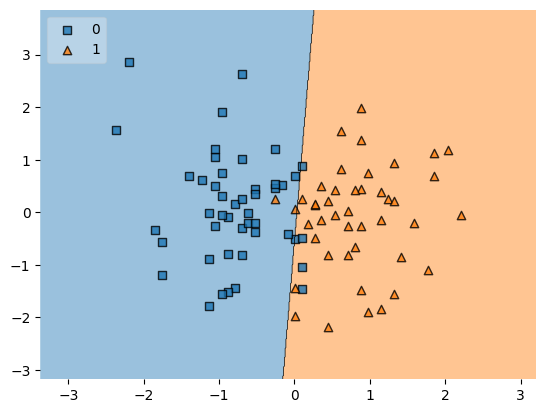

In [35]:
  plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf,open('model.pkl','wb'))